In [1]:
#Importing relevant modules (NumPy and Qiskit)
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, transpile #Qiskit is a package from IBM which allows for quantum computing within the Python language
from qiskit.visualization import plot_distribution

ImportError: cannot import name 'Self' from 'typing_extensions' (/Users/tomholmes/opt/anaconda3/lib/python3.9/site-packages/typing_extensions.py)

1


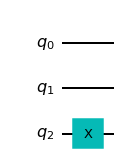

In [33]:
# CONSTANT ORACLE EXAMPLE
n=2 # Number of input qubits
ConstantOracle = QuantumCircuit(n+1) #Defining Quantum Circuit (+1 as that will be the output qubit)

output = np.random.randint(2) #Randomly generating 1 or 0 as the output
if output == 1:
    ConstantOracle.x(n)

print(output)
ConstantOracle.draw(output='mpl')


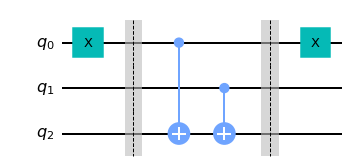

In [34]:
# BALANCED ORACLE EXAMPLE
BalancedOracle = QuantumCircuit(n+1)
b_str = "10" # defining the input
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        BalancedOracle.x(qubit)
        
BalancedOracle.barrier()

for qubit in range(n):
    BalancedOracle.cx(qubit,n)

BalancedOracle.barrier()

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        BalancedOracle.x(qubit)
        
BalancedOracle.draw(output='mpl')

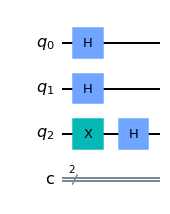

In [35]:
# Defining Deutsch-Jozsa Algorithm circuit
DJCircuit = QuantumCircuit(n+1,n)

for qubit in range(n):
    DJCircuit.h(qubit)

DJCircuit.x(n)
DJCircuit.h(n)
DJCircuit.draw(output='mpl')

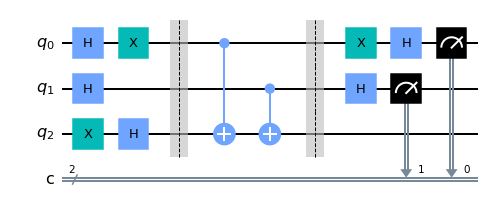

In [36]:
# Combining DJ Circuit with Oracle and adding more H gates at the end
DJCircuit = QuantumCircuit(n+1,n)

for qubit in range(n):
    DJCircuit.h(qubit)

DJCircuit.x(n)
DJCircuit.h(n)

DJCircuit = DJCircuit.compose(BalancedOracle)

for qubit in range(n):
    DJCircuit.h(qubit)

for i in range(n):
    DJCircuit.measure(i,i)

DJCircuit.draw(output='mpl')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

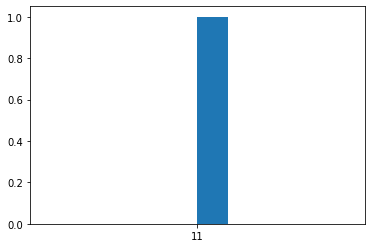

In [37]:
aer_sim = Aer.get_backend('aer_simulator') 
results = aer_sim.run(DJCircuit).result()
answer = results.get_counts()

plt.hist(answer)

0


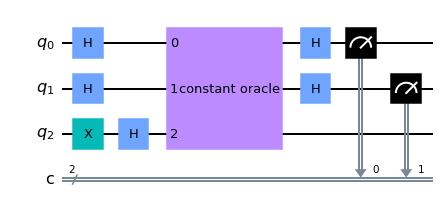

In [58]:
#Defining a function that creates an oracle (balanced or constant). It takes the argument of balanced or constant and the number of qubits.
def DJOracle(case, n):
    QCOracle = QuantumCircuit(n+1)
    
    if case == "balanced":
        b = np.random.randint(1,2**n) #Generating the input of the oracle
        b_str = format(b, '0'+str(n)+'b')
        print(b)
        print(b_str)
        #Writing out input in string format
        
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                QCOracle.x(qubit)
        
        for qubit in range(n):
            QCOracle.cx(qubit,n)
        
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                QCOracle.x(qubit)
    
    if case == "constant":
        output = np.random.randint(2)
        print(output)
        if output == 1:
            QCOracle.x(n)
        

    OracleGate = QCOracle.to_gate()
    OracleGate.name = case+" oracle" 
    return OracleGate, QCOracle


def DJAlgorithm(oracle, n):
    DJCircuit = QuantumCircuit(n+1,n)
    DJCircuit.x(n)
    DJCircuit.h(n)

    for qubit in range(n):
        DJCircuit.h(qubit)

    DJCircuit.append(oracle, range(n+1))

    for qubit in range(n):
        DJCircuit.h(qubit)

    for i in range(n):
        DJCircuit.measure(i,i)

    return DJCircuit


n = 2
OracleGate,QCOracle = DJOracle('constant', n)
DJCircuit = DJAlgorithm(OracleGate,n)
DJCircuit.draw(output='mpl')



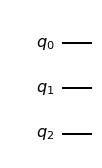

In [59]:
#Plotting the Oracle to see the gate mechanics
QCOracle.draw(output='mpl')

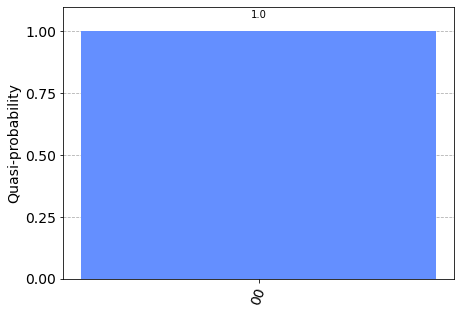

In [60]:
aer_sim = Aer.get_backend('aer_simulator') 
transpiled_DJCircuit = transpile(DJCircuit, aer_sim)
results = aer_sim.run(transpiled_DJCircuit).result()
answer = results.get_counts()
plot_distribution(answer)